In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Objetivo**

Realizar un programa que retorne las soluciones para dos péndulos dobles distintos y poderlos graficar para ver cómo es su evolución temporal.

# **Péndulo Doble**
# Descripción del sistema y ecuaciones de Lagrange

Consideremos un péndulo doble formado por dos brazos, de longitudes $l_1$ y $l_2$, de los cuales cuelgan dos
masas $m_1$ y $m_2$ respectivamente. Podemos describir el sistema mediante los ángulos $θ_1$ y $θ_2$ que forman
respectivos brazos con la horizontal, tal y como muestra la figura:

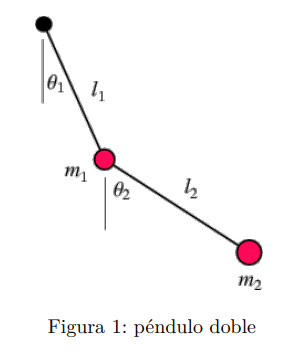

**Energía potencial**

Situamos el nivel cero de energía potencial en el punto de suspensión del primer péndulo. La energía potencial es

\begin{equation}
V=-m_1gl_1\cos θ_1-m_2g(l_1\cos θ_1+l_2\cos θ_2)
\end{equation}

Por tanto:
\begin{equation}
V=-(m_1+m_2)gl_1\cos θ_1-m_2gl_2\cos θ_2
\end{equation}


La velocidad de la masa 1 será $\vec{v_1} = l_1\dot{θ_1} (\cos {θ_1\hat{i}} + \sin {θ_1\hat{j}})$. La velocidad de la masa 2 respecto a la masa 1 es $ \vec{v_{12}} = l_2\dot{θ_2} (\cos θ_2\hat{i} + \sin θ_2\hat{j})$.

Calculamos los módulos de las velocidades de las dos partículas. La energía cinética del sistema es

\begin{equation}
T = \frac{1}{2}m_1l_1^2\dot{\theta_1}^2 + \frac{1}{2}m_2l_1^2\dot{\theta_1}^2 + \frac{1}{2}m_2l_2^2\dot{\theta_2}^2 + m_2l_1l_2\dot{\theta_1}\dot{\theta_2}\cos (\theta_1 - \theta_2)
\end{equation}

**Ecuaciones del movimiento**

Las ecuaciones del movimiento de Lagrange nos llevan al sistema de dos ecuaciones diferenciales de segundo orden.La lagrangiana $L=T-V$:

\begin{equation}
L = \frac{1}{2}(m_1 + m_2)l_1^2\dot{\theta_1}^2 + \frac{1}{2}m_2l_2^2\dot{\theta_2}^2 + m_2l_1l_2\dot{\theta_1}\dot{\theta_2}\cos (\theta_1 - \theta_2) + (m_1 + m_2)gl_1\cos \theta_1 + m_2gl_2\cos \theta_2
\end{equation}

La primera ecuación de movimiento, se obtiene así:

Con $\frac{\mathrm{d}}{\mathrm{d}t}\frac{\partial L}{\partial\dot{\theta_1}} - \frac{\partial L}{\partial \theta_1} = 0$, tenemos:

Por un lado

\begin{equation}
\frac{\partial L}{\partial \theta_1} = -m_2l_1l_2\dot{\theta_1}\dot{\theta_2}\sin (\theta_2 -\theta_2) - (m_1 + m_2)gl_1\sin \theta_1
\end{equation}

Y por el otro lado
\begin{equation}
\frac{\partial L}{\partial\dot{\theta_1}} = (m_1 + m_2)l_1^2\dot{\theta_1} + m_2l_1l_2\dot{\theta_2}\cos (\theta_1 - \theta_2)
\end{equation}

por tanto:

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}t}\frac{\partial L}{\partial\dot{\theta_1}} = m_2l_2^2\ddot{\theta_2} + m_2l_1l_2\ddot{\theta_1}\cos (\theta_1 - \theta_2) - m_2l_1l_2\dot{\theta_1} \sin (\theta_1 - \theta_2)(\dot{\theta_1} + \dot{\theta_2})
\end{equation}

Así, obtenemos la siguiente ecuación:

\begin{equation}
(m_1 + m_2)l_1^2\ddot{\theta_1} + m_2l_1l_2\ddot{\theta_2}\cos (\theta_1 - \theta_2) + m_2l_1l_2\ddot{\theta_2}^2\sin (\theta_1 - \theta_2) + (m_1 + m_2)gl_1\sin \theta_1 = 0
\end{equation}

Análogamente, la segunda ecuación de movimiento la obtenemos usando

$\frac{\mathrm{d}}{\mathrm{d}t}\frac{\partial L}{\partial\dot{\theta_2}} - \frac{\partial L}{\partial \theta_2} = 0$, en donde después de un proceso similar, obtenemos:

\begin{equation}
m_2l_2^2\ddot{\theta_2} + m_2l_1l_2\ddot{\theta_1}\cos (\theta_1 - \theta_2) - m_2l_1l_2\dot{\theta_1}^2\sin (\theta_1 - \theta_2) + m_2gl_2\sin \theta_2 = 0
\end{equation}

Despejando $\ddot{\theta_1}$ y $\ddot{\theta_2}$ de las ecuaciones halladas, obtenemos:

$
\ddot{\theta_1} = \frac{\cos (\theta_1 - \theta_2) (\frac{g}{l_1}\sin \theta_2 - \dot{\theta_1}^2\sin (\theta_1 - \theta_2)) - \frac{l_2}{l_1}((m + 1)\frac{g}{l_2}\sin \theta_1 + \dot{\theta_2}^2\sin (\theta_1 - \theta_2))}{m + \sin^2 (\theta_1 - \theta_2)}
$

$
\ddot{\theta_2} = \frac{\cos (\theta_1 - \theta_2)((m + 1)\frac{g}{l_2}\sin \theta_1 + \dot{\theta_2}^2\sin (\theta_1 - \theta_2)) - (m + 1)\frac{l_1}{l_2}(\frac{g}{l_1}\sin \theta_2 - \dot{\theta_1}^2\sin (\theta_1 - \theta_2))}{m + \sin^2 (\theta_1 - \theta_2)}
$
En donde $m=m_1/m_2$

La energía total del sistema es constante, por lo que la podremos usar para verificar si el procedimiento numérico da buenos resultados:

\begin{equation}
E = \frac{1}{2}(m_1 + m_2)l_1^2\dot{\theta_1}^2 + \frac{1}{2}m_2l_2^2\dot{\theta_2}^2 + m_2l_1l_2\dot{\theta_1}\dot{\theta_2}\cos (\theta_1 - \theta_2) -(m_1 + m_2)gl_1\cos \theta_1 - m_2gl_2\cos \theta_2
\end{equation}

---
#**Solución:**
con

$\theta_1(0) = \theta_{01}$,
$\dot{\theta_1}(0)=0$,

$\theta_2(0) = \theta_{02}$,
$\dot{\theta_2}(0) = 0$

Y usamos:

$
\ddot{\theta_1} = \frac{\cos (\theta_1 - \theta_2) (\frac{g}{l_1}\sin \theta_2 - \dot{\theta_1}^2\sin (\theta_1 - \theta_2)) - \frac{l_2}{l_1}((m + 1)\frac{g}{l_2}\sin \theta_1 + \dot{\theta_2}^2\sin (\theta_1 - \theta_2))}{m + \sin^2 (\theta_1 - \theta_2)}
$

$
\ddot{\theta_2} = \frac{\cos (\theta_1 - \theta_2)((m + 1)\frac{g}{l_2}\sin \theta_1 + \dot{\theta_2}^2\sin (\theta_1 - \theta_2)) - (m + 1)\frac{l_1}{l_2}(\frac{g}{l_1}\sin \theta_2 - \dot{\theta_1}^2\sin (\theta_1 - \theta_2))}{m + \sin^2 (\theta_1 - \theta_2)}
$

En donde $m=\frac{m_1}{m_2}$

In [17]:
def pendulo_doble(arr_1, arr_2, arr_3, arr_4, pasos, h, t0 = 0, args1=(1,1,1,1,10), args2=(1,1,1,1,10)):
  """Función que recibe la información de dos péndulos dobles y retorna sus posiciones en coordenadas
      cartesianas más su velocidad angular. arr_1, arr_2 y args_1 es la información del primer péndulo doble.
      arr_3, arr_4 y args2 es la información del segundo péndulo doble.
      Inputs-> a1_arr: np.array([Ángulo inicial, Velocidad angular inicial]);
               a2_arr: np.array([Ángulo inicial, Velocidad angular inicial]);
               a3_arr: np.array([Ángulo inicial, Velocidad angular inicial]);
               a4_arr: np.array([Ángulo inicial, Velocidad angular inicial]);
               t0: tiempo incial;
               h: tamaño de paso (del runge kutta);
               args1 = np.array([Masa 1, Masa 2, Longitud cuerda 1, Longitud cuerda 2, Gravedad]);
               args2 = np.array([Masa 1, Masa 2, Longitud cuerda 1, Longitud cuerda 2, Gravedad])"""

  #Desepaquetamos las constantes de los sistemas
  m1, m2, l1, l2, g = args1
  m3, m4, l3, l4, g = args2
  m = m1/m2

  #FUNCIONES QUE RETORNAN LA SEGUNDA DERIVADA DEL ÁNGULO
    #Para el ángulo 1
  def ddot_angulo1(arr_1, arr_2):
    ang_1, vel_1 = arr_1  #Separamos la posicion angular y la velocidad angular
    ang_2, vel_2 = arr_2
    numerador = np.cos(ang_1 - ang_2)*( (g/l1)*np.sin(ang_2) - (vel_1**2)*np.sin(ang_1 - ang_2) ) - (l2/l1)*( (m+1)*(g/l2)*np.sin(ang_1) + (vel_2**2)*np.sin(ang_1 - ang_2) )
    denominador = m + np.sin(ang_1 - ang_2)**2
    return numerador/denominador
    #Para el ángulo 2
  def ddot_angulo2(arr_1, arr_2):
    ang_1, vel_1 = arr_1
    ang_2, vel_2 = arr_2
    numerador = np.cos(ang_1 - ang_2)*( (m+1)*(g/l2)*np.sin(ang_1) + (vel_2**2)*np.sin(ang_1 - ang_2) ) - (m+1)*(l1/l2)*((g/l1)*np.sin(ang_2) - (vel_1**2)*np.sin(ang_1 - ang_2) )
    denominador = m + np.sin(ang_1 - ang_2)**2
    return numerador/denominador

  #CÁLCULO DE PRIMERAS Y SEGUNDAS DERIVADAS
    #Para el ángulo 1
  def deriv_a1(t, arr_1, arr_2):
    """Retorna un array np.array([primera derivada, segunda derivada])
      Inputs-> a1_arr: np.array([Ángulo inicial, Velocidad angular inicial]);
               a2_arr: np.array([Ángulo inicial, Velocidad angular inicial]);
               t: int o float. Es el valor del tiempo"""
    return np.array([arr_1[1], ddot_angulo1(arr_1, arr_2)])
    #Para el ángulo 2
  def deriv_a2(t, arr_2, arr_1):
    """Nótese que aquí el arr_2 y el arr_1 cambian de posición con respecto a
        deriv_a1. Esto es de vital importancia en el uso del runge-kutta."""
    return np.array([arr_2[1], ddot_angulo2(arr_1, arr_2)])

  def RungeKutta(func, arr_principal, arr_secundario, t0, h):
    """Retorna un array np.array([primera derivada, segunda derivada])
        Inputs-> func: Función que toma tres argumentos;
                 arr_principal: np.array([Ángulo inicial, Velocidad angular inicial]);
                 arr_secundario: np.array([Ángulo inicial, Velocidad angular inicial])
                 t0: int o float. El valor de inicio del tiempo;
                 h: float. Tamaño del paso;
        Aquí arr_principal y arr_secundario va a depender de cuando usemos deriv_a1 o deriv_a2, en cuyos casos
        para deriv_a1 el arr_princial es arr_1, y para deriv_a2 es arr_2."""
    y = arr_principal #Trabajamos con el arreglo principal, ya sea arr_1 o arr_2

    k1 = func(t0       , y            , arr_secundario)
    k2 = func(t0 + h/2 , y + (h/2)*k1 , arr_secundario)
    k3 = func(t0 + h/2 , y + (h/2)*k2 , arr_secundario)
    k4 = func(t0 + h   , y +  h*k3    , arr_secundario)
    kmean = (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    y = y + kmean

    """Note que aquí la parte de t0 no aporta nada al runge-kutta. Se dejó expresado
    para mantener la estructura."""

    return y #Array que contiene las soluciones para la primera y segunda derivada

  #CÁLCULO DE LAS POSICIONES Y VELOCIDADES

  #Creamos unos nuevos arrays a los que les iremos añadiendo las soluciones
  func_array1 = arr_1
  func_array2 = arr_2
  func_array3 = arr_3
  func_array4 = arr_4

  for i in range(pasos):
    save1 = arr_1 #Guardamos el arr_1 antes de modificarlo
    save3 = arr_3

    #Primer péndulo doble
    arr_1 = RungeKutta(deriv_a2, arr_1, arr_2, t0, h)  #Calculamos posición y velocidad con el runge-kutta
    arr_2 = RungeKutta(deriv_a1, arr_2,  save1, t0, h) #Note que es importante cambiar de posicion arr_2 y arr_1, y que acá usamos el save
    func_array1 = np.vstack((func_array1, arr_1))      #Añadimos una fila con los siguientes valores de posición y velocidad
    func_array2 = np.vstack((func_array2, arr_2))

    #Segundo péndulo doble
    arr_3 = RungeKutta(deriv_a2, arr_3, arr_4, t0, h)
    arr_4 = RungeKutta(deriv_a1, arr_4,  save3, t0, h)
    func_array3 = np.vstack((func_array3, arr_3))
    func_array4 = np.vstack((func_array4, arr_4))

  #Primer pénduo doble
  pendulo1, pendulo1_vel_angular = func_array1.transpose() #Sacamos la transpuesta donde nos queda una matiz de dos filas y tantas columnas como pasos
  pendulo2, pendulo2_vel_angular = func_array2.transpose()  #Primera fila posicion, segunda fila velocidad

  #Lo pasamos a coordenadas cartesianas
  pendulo1_x = l1*np.sin(pendulo1)
  pendulo1_y = - l1*np.cos(pendulo1)
  pendulo2_x = l2*np.sin(pendulo2) + pendulo1_x
  pendulo2_y = pendulo1_y - l2*np.cos(pendulo2)

  #Segundo péndulo doble
  pendulo3, pendulo3_vel_angular = func_array3.transpose()
  pendulo4, pendulo4_vel_angular = func_array4.transpose()

  pendulo3_x = l3*np.sin(pendulo3)
  pendulo3_y = - l3*np.cos(pendulo3)
  pendulo4_x = l4*np.sin(pendulo4) + pendulo3_x
  pendulo4_y = pendulo3_y - l4*np.cos(pendulo4)

  return pendulo2_x, pendulo2_y, pendulo4_x, pendulo4_y, pendulo1_x, pendulo1_y, pendulo3_x, pendulo3_y, pendulo1_vel_angular, pendulo2_vel_angular, pendulo3_vel_angular, pendulo4_vel_angular

# **Dando valores a los péndulos:**

(Tiempo de ejecución alrededor de 1 minuto)

In [145]:
#Otorgamos valores de dos péndulos dobles para calcular
ang_1 = np.pi/2            #@param
ang_2 = np.pi/2            #@param
ang_3 = np.pi/2 - 0.0001            #@param
ang_4 = np.pi/2 - 0.0001            #@param

vel_1 = 0                  #@param
vel_2 = 0                  #@param
vel_3 = 0                  #@param
vel_4 = 0                  #@param


arr_1 = np.array([ang_1, vel_1])
arr_2 = np.array([ang_2, vel_2])

arr_3 = np.array([ang_3, vel_3])
arr_4 = np.array([ang_4, vel_4])

pasos = 100000 #@param
h = 0.001      #@param

p = pendulo_doble(arr_1, arr_2, arr_3, arr_4, pasos, h)

In [ ]:
#@title Posición inicial de los péndulos
l1,l2= 1,1
plt.figure(figsize=(8,5))
plt.plot(0, 0, 'o', color='green')
plt.plot((p[4][0],0), (p[5][0],0), 'o-', color='blue')
plt.plot((p[0][0], p[4][0]), (p[1][0],p[5][0]), 'o-', color='blue')

plt.plot((p[6][0],0), (p[7][0],0), 'o-', color='red')
plt.plot((p[2][0], p[6][0]), (p[3][0],p[7][0]), 'o-', color='red')
plt.hlines(-l1-l2,l1+l2, -l1-l2, color='k')
plt.grid();

Total de pasos: 100000
Diferencia entre el ángulo 1 y el ángulo 3: 9.999999999998899e-05
Diferencia entre en ángulo 2 y el ángulo 4: 9.999999999998899e-05
Diferencia entre velocidad 1 y velocidad 3: 0
Diferencia entre velocidad 2 y velocidad 4: 0


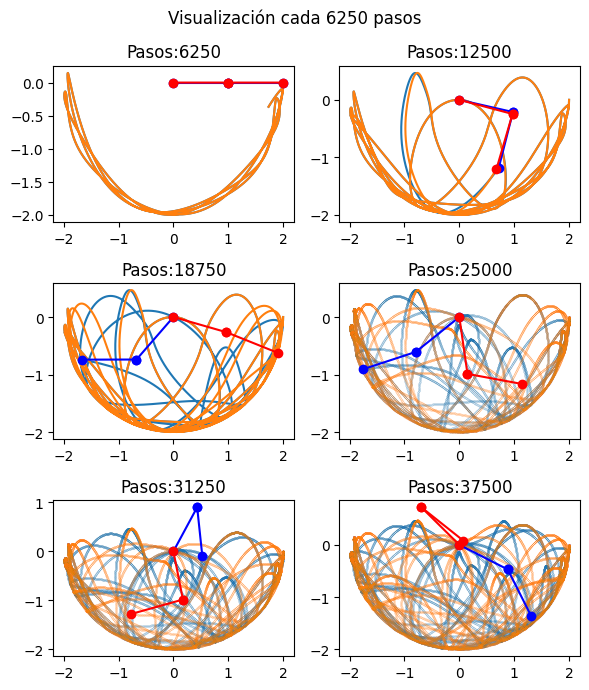

In [156]:
#@title #**Graficación**
tiempos = int(pasos/16) #Dividimos el número de pasos en 16

#Graficamos sumando de el valor de tiempos cada vez

fig, axs = plt.subplots(3, 2, figsize=(6,7))
fig.suptitle(f'Visualización cada {tiempos} pasos')
#Tiempo 1==============================================
axs[0, 0].plot(p[0][0 : tiempos], p[1][0 : tiempos])
axs[0, 0].plot(p[2][0 : tiempos], p[3][0 : tiempos])

axs[0, 0].plot((p[4][0],0), (p[5][0],0), 'o-', color='blue')
axs[0, 0].plot((p[0][0], p[4][0]), (p[1][0],p[5][0]), 'o-', color='blue')

axs[0, 0].plot((p[6][0],0), (p[7][0],0), 'o-', color='red')
axs[0, 0].plot((p[2][0], p[6][0]), (p[3][0],p[7][0]), 'o-', color='red')
axs[0, 0].set_title(f'Pasos:{tiempos}')


#Tiempo 2==============================================
axs[0, 1].plot(p[0][0 : 2*tiempos], p[1][0 : 2*tiempos])
axs[0, 1].plot(p[2][0 : 2*tiempos], p[3][0 : 2*tiempos])

axs[0, 1].plot((p[4][2*tiempos] , 0) , (p[5][2*tiempos],0),   'o-', color='blue')
axs[0, 1].plot((p[0][2*tiempos]      ,    p[4][2*tiempos]),   (p[1][2*tiempos],p[5][2*tiempos]), 'o-', color='blue')

axs[0, 1].plot((p[6][2*tiempos] , 0) , (p[7][2*tiempos],0),   'o-', color='red')
axs[0, 1].plot((p[2][2*tiempos]      ,    p[6][2*tiempos]),   (p[3][2*tiempos],p[7][2*tiempos]), 'o-', color='red')

axs[0, 1].set_title(f'Pasos:{2*tiempos}')

#Tiempo 3==============================================
axs[1, 0].plot(p[0][0 : 3*tiempos], p[1][0 : 3*tiempos])
axs[1, 0].plot(p[2][0 : 3*tiempos], p[3][0 : 3*tiempos])

axs[1, 0].plot((p[4][3*tiempos] , 0) , (p[5][3*tiempos],0),   'o-', color='blue')
axs[1, 0].plot((p[0][3*tiempos]      ,    p[4][3*tiempos]),   (p[1][3*tiempos],p[5][3*tiempos]), 'o-', color='blue')

axs[1, 0].plot((p[6][3*tiempos] , 0) , (p[7][3*tiempos],0),   'o-', color='red')
axs[1, 0].plot((p[2][3*tiempos]      ,    p[6][3*tiempos]),   (p[3][3*tiempos],p[7][3*tiempos]), 'o-', color='red')

axs[1, 0].set_title(f'Pasos:{3*tiempos}')

#Tiempo 4==============================================
axs[1, 1].plot(p[0][0 : 4*tiempos], p[1][0 : 4*tiempos], '.', markersize=0.1)
axs[1, 1].plot(p[2][0 : 4*tiempos], p[3][0 : 4*tiempos], '.', markersize=0.1)

axs[1, 1].plot((p[4][4*tiempos] , 0) , (p[5][4*tiempos],0),   'o-', color='blue')
axs[1, 1].plot((p[0][4*tiempos]      ,    p[4][4*tiempos]),   (p[1][4*tiempos],p[5][4*tiempos]), 'o-', color='blue')

axs[1, 1].plot((p[6][4*tiempos] , 0) , (p[7][4*tiempos],0),   'o-', color='red')
axs[1, 1].plot((p[2][4*tiempos]      ,    p[6][4*tiempos]),   (p[3][4*tiempos],p[7][4*tiempos]), 'o-', color='red')

axs[1, 1].set_title(f'Pasos:{4*tiempos}')

#Tiempo 5==============================================
axs[2, 0].plot(p[0][0 : 5*tiempos], p[1][0 : 5*tiempos], '.', markersize=0.1)
axs[2, 0].plot(p[2][0 : 5*tiempos], p[3][0 : 5*tiempos], '.', markersize=0.1)

axs[2, 0].plot((p[4][5*tiempos] , 0) , (p[5][5*tiempos],0),   'o-', color='blue')
axs[2, 0].plot((p[0][5*tiempos]      ,    p[4][5*tiempos]),   (p[1][5*tiempos],p[5][5*tiempos]), 'o-', color='blue')

axs[2, 0].plot((p[6][5*tiempos] , 0) , (p[7][5*tiempos],0),   'o-', color='red')
axs[2, 0].plot((p[2][5*tiempos]      ,    p[6][5*tiempos]),   (p[3][5*tiempos],p[7][5*tiempos]), 'o-', color='red')

axs[2, 0].set_title(f'Pasos:{5*tiempos}')

#Tiempo 6==============================================
axs[2, 1].plot(p[0][0 : 6*tiempos], p[1][0 : 6*tiempos], '.', markersize=0.1)
axs[2, 1].plot(p[2][0 : 6*tiempos], p[3][0 : 6*tiempos], '.', markersize=0.1)
axs[2, 1].set_title(f'Pasos:{6*tiempos}')

axs[2, 1].plot((p[4][6*tiempos] , 0) , (p[5][6*tiempos],0),   'o-', color='blue')
axs[2, 1].plot((p[0][6*tiempos]      ,    p[4][6*tiempos]),   (p[1][6*tiempos],p[5][6*tiempos]), 'o-', color='blue')

axs[2, 1].plot((p[6][6*tiempos] , 0) , (p[7][6*tiempos],0),   'o-', color='red')
axs[2, 1].plot((p[2][6*tiempos]      ,    p[6][6*tiempos]),   (p[3][6*tiempos],p[7][6*tiempos]), 'o-', color='red')

fig.tight_layout()

print(f'''=================================================================
Total de pasos: {pasos}
Diferencia entre el ángulo 1 y el ángulo 3: {abs(ang_1 - ang_3)}
Diferencia entre en ángulo 2 y el ángulo 4: {abs(ang_2 - ang_4)}
Diferencia entre velocidad 1 y velocidad 3: {abs(vel_1 - vel_3)}
Diferencia entre velocidad 2 y velocidad 4: {abs(vel_2 - vel_4)}
=================================================================''')

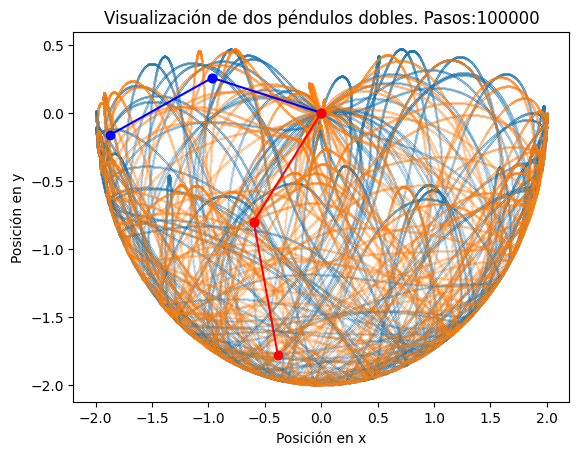

In [180]:
#@title **Gráfica con los pasos completos**
plt.title(f'Visualización de dos péndulos dobles. Pasos:{pasos}')
plt.plot(p[0],p[1], '.', markersize=0.2)
plt.plot(p[2],p[3], '.', markersize=0.2)

plt.plot((p[4][16*tiempos] , 0) , (p[5][16*tiempos],0),   'o-', color='blue')
plt.plot((p[0][16*tiempos]      ,    p[4][16*tiempos]),   (p[1][16*tiempos],p[5][16*tiempos]), 'o-', color='blue')
plt.plot((p[6][16*tiempos] , 0) , (p[7][16*tiempos],0),   'o-', color='red')
plt.plot((p[2][16*tiempos]      ,    p[6][16*tiempos]),   (p[3][16*tiempos],p[7][16*tiempos]), 'o-', color='red')

plt.xlabel('Posición en x')
plt.ylabel('Posición en y');

---
#**Enegía total del sistema**

Para verificar qué tan bueno es el procedimiento numérico utilizado utilizamos la fórmula de la energía total que debería permanecer constante:

\begin{equation}
E = \frac{1}{2}(m_1 + m_2)l_1^2\dot{\theta_1}^2 + \frac{1}{2}m_2l_2^2\dot{\theta_2}^2 + m_2l_1l_2\dot{\theta_1}\dot{\theta_2}\cos (\theta_1 - \theta_2) -(m_1 + m_2)gl_1\cos \theta_1 - m_2gl_2\cos \theta_2
\end{equation}

Conclusiones:

Vemos que la enería del sistema se mueve en un rango que difiere en sus extremos un máximo en 80 Julios.
Recordemos que la energía del sistema debía dar constante, sin embargo una diferencia de 80 Julios entre
sus máximos es realmente pequeña por lo que podemos concluir que el proceso numérico utilizado está bien aproximado.



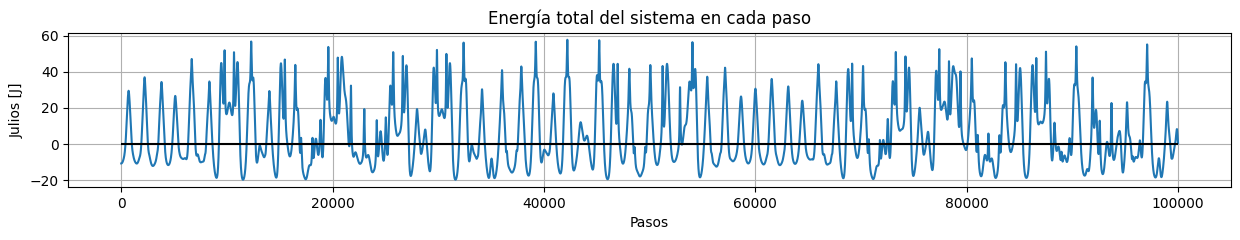

In [181]:
#Traemos los valores hallados de posición y velocidad para el primer péndulo doble
vel_ang1 = p[8]
vel_ang2 = p[9]
pos_ang1 = p[4]
pos_ang2 = p[0]
m1, m2 = 1, 1
l1, l2 = 1, 1
g = 10

#Calulamos la energía
E = (1/2)*(m1 + m2)*(l1**2)*(vel_ang1**2) + (1/2)*m2*(l2**2)*(vel_ang2**2) + m2*l1*l2*vel_ang1*vel_ang2*np.cos(pos_ang1 - pos_ang2) - (m1 + m2)*g*l1*np.cos(pos_ang1) - m2*g*l2*np.cos(ang_2)

#GRAFICACIÓN
plt.figure(figsize=(15,2))
plt.title('Energía total del sistema en cada paso')
plt.plot(range(pasos+1), E)
plt.ylabel('Julios [J]')
plt.xlabel('Pasos')
plt.hlines(0, pasos, 0, color='k')
plt.grid();

print('''Conclusiones:

Vemos que la enería del sistema se mueve en un rango que difiere en sus extremos un máximo en 80 Julios.
Recordemos que la energía del sistema debía dar constante, sin embargo una diferencia de 80 Julios entre
sus máximos es realmente pequeña por lo que podemos concluir que el proceso numérico utilizado está bien aproximado.
''')

# **Bibliografía**

http://www.sc.ehu.es/sbweb/fisica3/oscilaciones/pendulo_doble/pendulo_doble.html

http://alumno.us.es/javlintor/files/MT/pendulodoble.pdf